# Notebook Imports
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import pprint

%matplotlib inline

# Constants

In [2]:
DATASET_PATH = "dataset.csv"
RANDOM_STATE = 1

LABEL_NAMES = ["English", "Urdu", "Mixed"]

# Importing and Splitting Data

In [3]:
data = pd.read_csv(DATASET_PATH)
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,LABEL
0,0,14.443077,-8.036094,-4.077253,-0.274023,-9.003208,-17.048237,-21.399697,-16.263466,3.396780,-12.284809,0.908476,-10.026655,-4.254287,0
1,1,10.219182,1.742702,1.002258,-2.806073,-14.951893,-21.500796,-13.495337,-9.305933,-7.441661,-1.825364,-8.279968,0.422083,-3.959009,0
2,2,13.876193,1.004525,-10.143044,4.769317,-25.268881,-12.703184,-17.730170,-6.543746,-15.888943,-2.577060,-9.861565,1.551331,-3.312003,0
3,3,12.510054,-3.575093,-4.913943,-6.122454,-3.552648,-9.513949,-10.869105,-8.880711,1.368740,-5.230862,-0.560520,-4.260071,-8.647045,0
4,4,16.165702,7.492517,-18.944081,-11.769776,0.360446,-10.676715,-10.353008,7.848967,0.781196,-0.323822,-6.596552,-6.907072,-4.249575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,17375,12.577980,0.449793,8.464243,13.715499,-1.113134,2.922420,-6.761397,2.240919,4.728756,-3.520493,6.343505,1.306161,-3.577430,1
17376,17376,10.832928,5.712939,6.460498,0.479978,-9.827152,-8.491606,-16.057971,-7.821987,-7.278880,-8.225414,-1.474205,-10.781243,-8.982661,1
17377,17377,15.653813,-6.198936,-0.756519,-0.182128,-5.058881,-12.113604,-15.959658,-1.984598,-3.341601,-5.365412,0.485510,-4.278507,-10.961661,1
17378,17378,14.656198,2.442599,-1.116128,-3.430590,-9.892589,-16.597521,-17.447496,-1.346676,-11.960978,-9.395277,-5.763173,-7.353033,-8.212849,1


In [4]:
# randomly shuffle dataframe

train = data.sample(frac=0.8, random_state=RANDOM_STATE)
test = data.drop(train.index)

print("Length of train dataset:", len(train))
print("Length of test dataset:", len(test))

Length of train dataset: 13904
Length of test dataset: 3476


In [5]:
x_train = np.array(train)[:, 1:-1]
y_train = np.array(train)[:, -1]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (13904, 13)
y_train shape: (13904,)


In [6]:
x_test = np.array(test)[:, 1:-1]
y_test = np.array(test)[:, -1]

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (3476, 13)
y_test shape: (3476,)


# Training And Validation

In [8]:
# hyper parameters

LR = "adaptive"
HIDDEN_LAYERS = (128, 64, 32, 16, 16)
SOLVER = "adam"
ACTIVATION = "relu"
ALPHA = 0.0001

param_grid = [
    {
        "hidden_layer_sizes": [
            (20, 10, 5),
            (20, 10, 10, 5),
            (64, 32, 16, 16),
            (128, 64, 32, 16, 16),
            (128, 64, 32, 16, 8),
            (128, 64, 32, 16, 16, 8),
            (128, 64, 32, 16, 8),
            (64, 64, 32, 16, 8),
        ], 
        "learning_rate_init": np.linspace(0.001, 0.001, 2),
        "alpha": np.linspace(0.0001, 0.1, 10)
    }
]


In [9]:
model = GridSearchCV(
    MLPClassifier(),
    param_grid=param_grid,
    scoring="accuracy",
    n_jobs=20,
    refit=True,
    verbose=3,
)
model.fit(x_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(estimator=MLPClassifier(), n_jobs=20,
             param_grid=[{'alpha': array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ]),
                          'hidden_layer_sizes': [(20, 10, 5), (20, 10, 10, 5),
                                                 (64, 32, 16, 16),
                                                 (128, 64, 32, 16, 16),
                                                 (128, 64, 32, 16, 8),
                                                 (128, 64, 32, 16, 16, 8),
                                                 (128, 64, 32, 16, 8),
                                                 (64, 64, 32, 16, 8)],
                          'learning_rate_init': array([0.001, 0.001])}],
             scoring='accuracy', verbose=3)

In [10]:
print("Best Validation Accuracy:", model.best_score_)
print("Best parameters:")
pprint.pprint(model.best_params_)

Best Validation Accuracy: 0.7107308328094806
Best parameters:
{'alpha': 0.1,
 'hidden_layer_sizes': (128, 64, 32, 16, 16),
 'learning_rate_init': 0.001}


In [11]:
best_model = model.best_estimator_

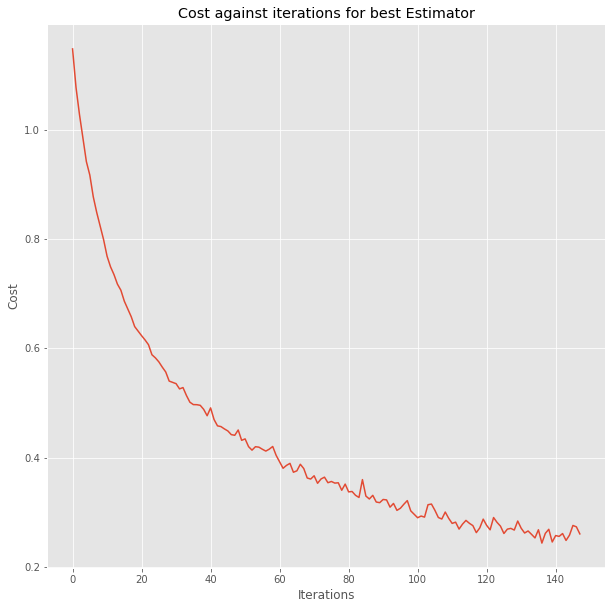

In [12]:
loss = best_model.loss_curve_

plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
plt.plot(range(len(loss)), loss)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost against iterations for best Estimator")
plt.show()


# Testing and Evaluation

In [13]:
preds = best_model.predict(x_test)

In [14]:
print(classification_report(y_test, preds, target_names=LABEL_NAMES))

              precision    recall  f1-score   support

     English       0.68      0.72      0.70      1060
        Urdu       0.69      0.69      0.69      1020
       Mixed       0.76      0.74      0.75      1396

    accuracy                           0.72      3476
   macro avg       0.71      0.71      0.71      3476
weighted avg       0.72      0.72      0.72      3476



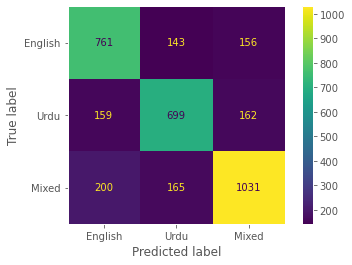

In [15]:
conf = confusion_matrix(y_test, preds)
matrix_plotter = ConfusionMatrixDisplay(conf, display_labels=LABEL_NAMES)


a = matrix_plotter.plot(ax=None)
a.ax_.grid()
plt.show()